In [41]:
import matplotlib.pyplot as plt # imports library used for plot creation
import numpy as np # imports library need to handle arrays, matrices and carry out  mathematical operations (i.e, exponent)
import math
%matplotlib inline

#### Mathematical equation to implement Forward Euler Method:

$$

y_{n+1} = y_{n} + h \frac{dy}{dt} (y_{n}, t_{n})

$$

In [2]:
class Model: # Define class
    def forwardeuler(self, f, Y0, tstop, tstart, h):  # Define function used for forward euler method and respective arguments 
        # User needs to bind the class atrributes with the specified arguments , self 
        # command enables the automated binding of instances with the given arguments
        
        self.f = f
        self.Y0 = Y0
        self.tstop = tstop
        self.tstart = tstart
        self.h = h
        
        number_of_obtainings = int((tstop - tstart)/h) # ensures number of iterations is a float literal (by removing all decimals)
        t = np.zeros(number_of_obtainings + 1)  # creates a 1D np array to store time points tn
        y = np.zeros(number_of_obtainings + 1 ) # creates a 1D np array to store values yn obtained by forward Euler's method
        y[0] = Y0 # Creates initial condition (specified by the user) which enters into the loop to calculate y[n+1]
        
        
        for n in range(number_of_obtainings): # loop which solves iteratively based on forward Euler method
            t[n+1] = t[n] + h # estimates next time point tn+1 based on previous time point tn and step size h
            y[n+1] = y[n] + h * f(y[n], t[n]) # forward Eulers method formula
        return y,t # send the function's result back to the caller

#### Mathematical expressions to implement Runge-Kutta methods:

* Second Order Runge Kutta Method:

$$
k_{1} = f(y_{n},t_{n})
$$

$$
k_{2} = f(y_{n} + k_{1}  h, t_{n} + h)
$$


$$

y_{n+1} = y_{n} + \frac{h}{2}  (k_{1} + k_{2})

$$

* Third Order Runge Kutta Method:

$$
k_{1} = f(y_{n},t_{n})
$$

$$
k_{2} = f(y_{n} + k_{1}  h, t_{n} + \frac{h}{2})
$$


$$
k_{3} = f(y_{n} + h ( 2k_{2} - k_{1}), t_{n} + \frac{h}{2})
$$

$$
y_{n+1} = y_{n} + \frac{h}{6}  (k_{1} + 4 k_{2} +  k_{3})
$$


* Fourth Order Runge Kutta Method:

$$
k_{1} = f(y_{n},t_{n})
$$

$$
k_{2} = f(y_{n} + h \frac{k_{1}}{2}, t_{n} + \frac{h}{2})
$$

$$
k_{3} = f(y_{n} + h  \frac{k_{2}}{2}, t_{n} + \frac{h}{2})
$$

$$
k_{4} = f(y_{n} + h k_{3}, t_{n} + h)
$$

$$
y_{n+1} =  y_{n} + \frac{h}{6} (k_{1} + 2k_{2} + 2k_{3} + k_{4})
$$


In [60]:
class RungeKutta:

    def second(self,f,Y0,tstop,tstart,h):


        self.f = f
        self.Y0 = Y0
        self.tstop = tstop
        self.tstart = tstart
        self.h = h

        number_of_obtainings = int((tstop - tstart)/h) # ensures number of iterations is a float literal (by removing all decimals)
        t = np.zeros(number_of_obtainings + 1)  # creates a 1D np array to store time points tn
        y = np.zeros(number_of_obtainings + 1 ) # creates a 1D np array to store values yn obtained by Runge-Kutta's method
        y[0] = Y0


        for n in range(number_of_obtainings):
            k1 = f(y[n], t[n])
            k2 = f( y[n] + k1 * h , t[n] + h)

            t[n+1] = t[n] + h
            y[n+1] = y[n] + (h / 2) * (k1 + k2)

        return y , t


## Third Order Runge Kutta Method
    def third(self,f,Y0,tstop,tstart,h):


        self.f = f
        self.Y0 = Y0
        self.tstop = tstop
        self.tstart = tstart
        self.h = h

        number_of_obtainings = int((tstop - tstart)/h) # ensures number of iterations is a float literal (by removing all decimals)
        t = np.zeros(number_of_obtainings + 1)  # creates a 1D np array to store time points tn
        y = np.zeros(number_of_obtainings + 1 ) # creates a 1D np array to store values yn obtained by Runge-Kutta's method
        y[0] = Y0

        for n in range(number_of_obtainings):
            k1 = f(y[n],t[n])
            k2 = f(y[n] + h * k1 / 2, t[n] + h/2)
            k3 = f(y[n] + h * (2 * k2 - k1), t[n] + h / 2)

            t[n+1] = t[n] + h
            y[n+1] = y[n] + (h / 6) * ( k1 + 4 * k2 +  k3)

        return y , t

## Fourth Order Runge Kutta Method

    def fourth(self,f,Y0,tstop,tstart,h):


        self.f = f
        self.Y0 = Y0
        self.tstop = tstop
        self.tstart = tstart
        self.h = h

        number_of_obtainings = int((tstop - tstart)/h) # ensures number of iterations is a float literal (by removing all decimals)
        t = np.zeros(number_of_obtainings + 1)  # creates a 1D np array to store time points tn
        y = np.zeros(number_of_obtainings + 1 ) # creates a 1D np array to store values yn obtained by Runge-Kutta's method
        y[0] = Y0

        for n in range(number_of_obtainings):
            k1 = f(y[n],t[n])
            k2 = f(y[n] + h * k1 / 2, t[n] + h/2)
            k3 = f(y[n] + h * k2 / 2, t[n] + h/2)
            k4 = f(y[n] + h* k3, t[n] + h)

            t[n+1] = t[n] + h
            y[n+1] = y[n] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

        return y , t



#### Equation to be solved with aforementioned schemes:

$$
\frac{dy}{dt} = -2ty
$$


In [16]:
def f(y , t): # Define function to be solved 
    dydt = - 2 * t **3 * y ** 2# Define function's equation form
    return dydt # send the equation form back to the caller

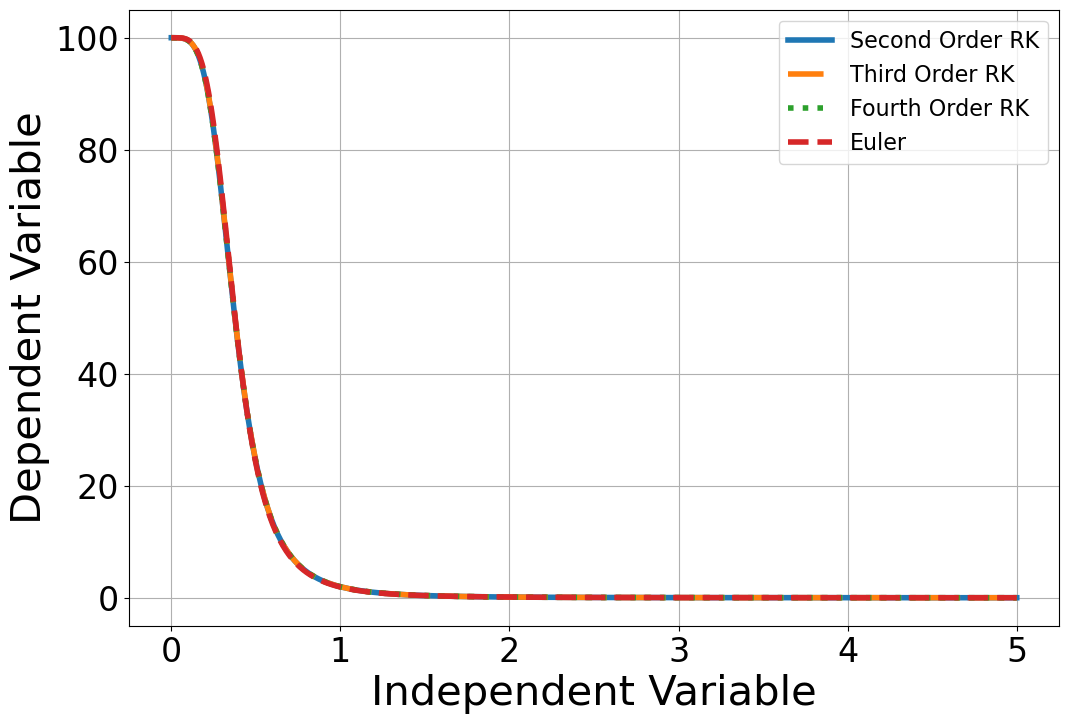

In [20]:

plt.figure(figsize = (12,8))
plt.ylabel('Dependent Variable', fontsize = 30) # to show axis labels and to determine fontsize
plt.xlabel('Independent Variable', fontsize = 30) # to show axis labels and to determine fontsize
plt.xticks(fontsize = 24) # change fontsize of values in x-axis
plt.yticks(fontsize = 24) # change fontsize of values in y-axis
plt.grid(True) # to show grid on the plot
    
Y0 = 100 # Specify desired initial condition y[0]=Y0

MyClass = RungeKutta() # initialize class

y_2RK , t_2RK = MyClass.second(f, Y0, 5, 0, 0.01) # Calls desired function from MyClass
y_3RK , t_3RK = MyClass.third(f, Y0, 5, 0, 0.01) # Calls desired function from MyClass
y_4RK , t_4RK = MyClass.fourth(f, Y0, 5, 0, 0.01) # Calls desired function from MyClass

MyClass = Model() 
y_euler , t_euler = MyClass.forwardeuler(f, Y0, 5, 0, 0.01)

plt.plot(t_2RK , y_2RK , linewidth = 4, linestyle = 'solid', label = 'Second Order RK') # Plots numerical solutions obtained by Runge-Kutta's method
plt.plot(t_3RK , y_3RK , linewidth = 4, linestyle = 'dashdot', label = 'Third Order RK') # Plots numerical solutions obtained by Runge-Kutta's method
plt.plot(t_4RK , y_4RK , linewidth = 4, linestyle = 'dotted', label = 'Fourth Order RK') # Plots numerical solutions obtained by Runge-Kutta's method
plt.plot(t_euler , y_euler , linewidth = 4, linestyle = 'dashed', label = 'Euler') # Plots numerical solutions obtained by forward Euler method
plt.legend(loc = 'best',  prop={'size': 16}) # To show which line corresponds to which label (thus YO)

#### To qualitatively assess how well the numerical schemes approximate the dependent variable, we can define a new ODE with known plotted solution. For example:

$$
g(t) = sin(t) 
$$

where g':
$$
g'(t) = \frac{d}{dt}g(t) = cos(t)
$$

In [55]:
def g(y , t): # Defines ODE to be solved
    dydt = math.cos(t) # Defines equation of ODE
    return dydt # sends the equation form back to the caller

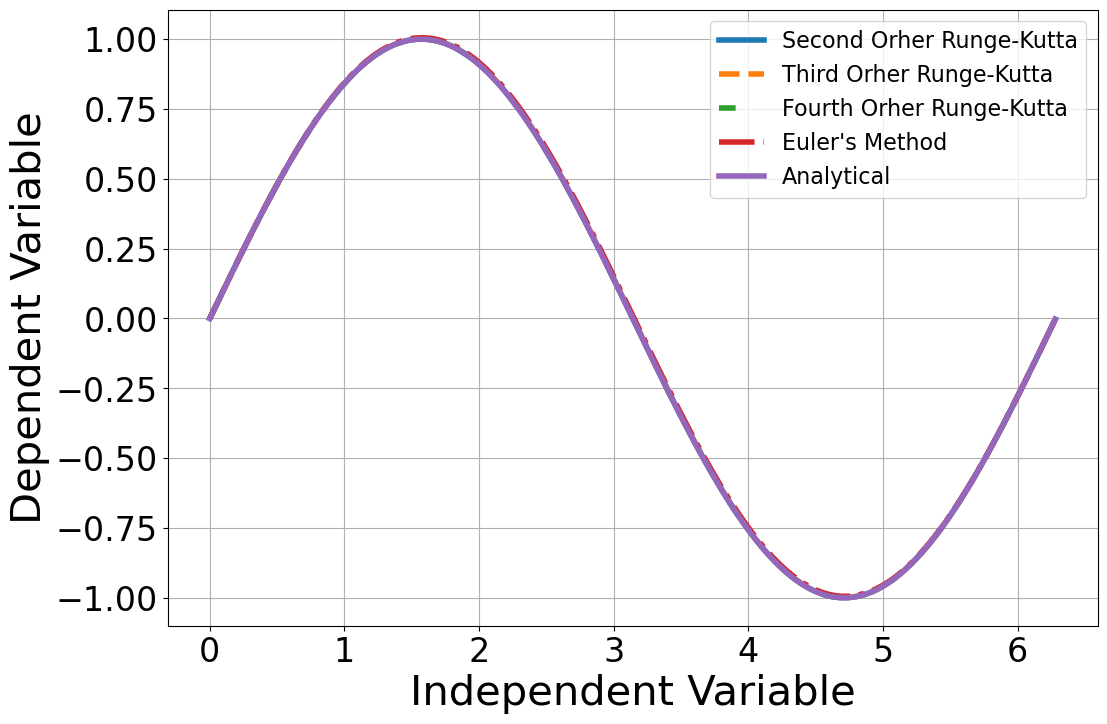

In [56]:
MyClass = Model() # # Initialize class call constructor
y_euler , t_euler = MyClass.forwardeuler(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01) # Calls desired function from MyClass

MyClass = RungeKutta() # # Initialize class call constructor

y_2RK , t_2RK = MyClass.second(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01) # Calls desired function from MyClass
y_3RK , t_3RK = MyClass.third(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01) # Calls desired function from MyClass
y_4RK , t_4RK = MyClass.fourth(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01) # Calls desired function from MyClass


t = t_euler
y_real = np.zeros(len(t)) # creates a 1D np array of equal size to time points, to store analytical solutions y_real

plt.figure(figsize = (12,8))
plt.ylabel('Dependent Variable', fontsize = 30) # to show axis labels and to determine fontsize
plt.xlabel('Independent Variable', fontsize = 30) # to show axis labels and to determine fontsize
plt.xticks(fontsize = 24) # change fontsize of values in x-axis
plt.yticks(fontsize = 24) # change fontsize of values in y-axis
plt.grid(True) # to show grid on the plot

for i in range(0,len(y_real)): # calls loop which solves analytical expression for each time point tn
    y_real[i] = math.sin(t[i]) # form of analytical expression

plt.plot(t_2RK , y_2RK, linewidth = 4, label = "Second Orher Runge-Kutta") # plots solutions obtained by Runge-Kutta's method
plt.plot(t_3RK , y_3RK, linewidth = 4, label = "Third Orher Runge-Kutta", linestyle = 'dashed') # plots solutions obtained by Runge-Kutta's method
plt.plot(t_4RK , y_4RK, linewidth = 4, label = "Fourth Orher Runge-Kutta", linestyle = (0, (3,10,1,10))) # plots solutions obtained byRunge-Kutta's method    
plt.plot(t_euler , y_euler, linewidth = 4, label = "Euler's Method", linestyle = 'dashdot') # plots solutions obtained by forward Euler's method
plt.plot(t , y_real, linewidth = 4, label = "Analytical", linestyle = 'solid') # plots solutions obtained by analytical expression
plt.legend(loc = 'best',  prop={'size': 16}) # to show which line corresponds to which label (analytical or numerical)

#### Comparison of numerical schemes
In terms of:
* Accuracy (i.e., convergence)
* Computational Cost

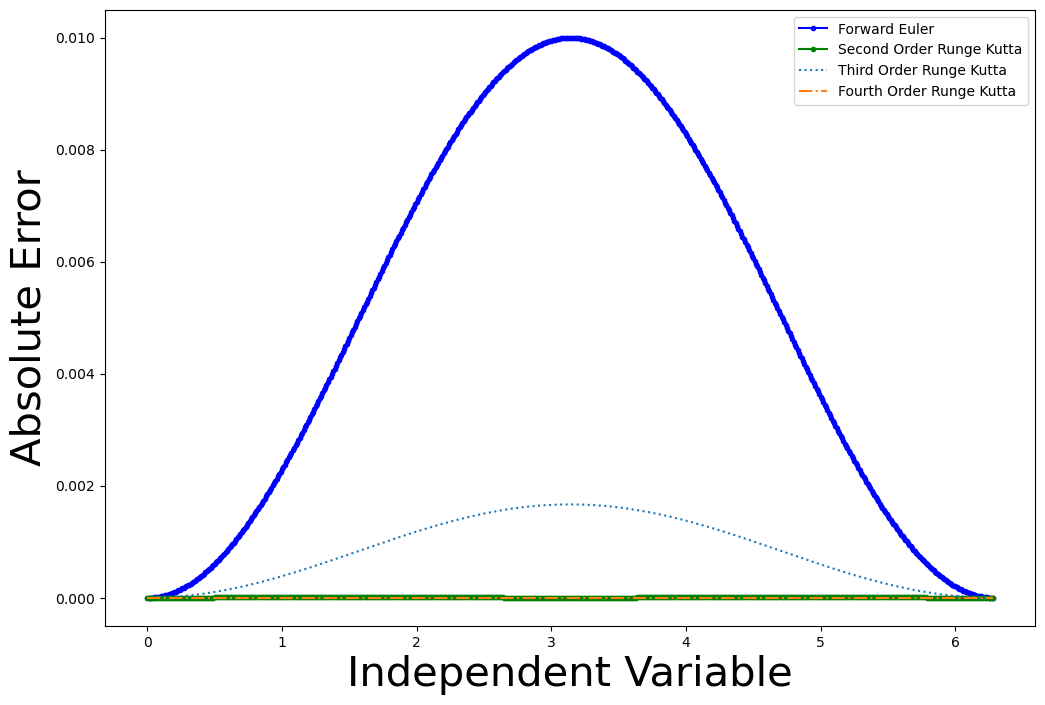

In [59]:
MyClass = Model() # # Initialize class call constructor
y_euler , t_euler = MyClass.forwardeuler(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01) # Calls desired function from MyClass

MyClass = RungeKutta() # # Initialize class call constructor

y_2RK , t_2RK = MyClass.second(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01) # Calls desired function from MyClass
y_3RK , t_3RK = MyClass.third(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01) # Calls desired function from MyClass
y_4RK , t_4RK = MyClass.fourth(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01) # Calls desired function from MyClass



t = t_euler
y_real = np.zeros(len(t)) # creates a 1D np array of equal size to time points, to store analytical solutions y_real
for i in range(0,len(y_real)): # calls loop which solves analytical expression for each time point tn
    y_real[i] = math.sin(t[i])# form of analytical expression
    

plt.figure(figsize = (12,8))
plt.ylabel('Absolute Error', fontsize = 30) # to show axis labels and to determine fontsize
plt.xlabel('Independent Variable', fontsize = 30) # to show axis labels and to determine fontsize
plt.plot(t_euler, np.abs(np.array(y_real) - np.array(y_euler)) , '.-b', label = 'Forward Euler')
plt.plot(t_2RK, np.abs(np.array(y_real) - np.array(y_2RK)) , '.-g', label = 'Second Order Runge Kutta')
plt.plot(t_3RK, np.abs(np.array(y_real) - np.array(y_3RK)) , linestyle = 'dotted', label = 'Third Order Runge Kutta')
plt.plot(t_4RK, np.abs(np.array(y_real) - np.array(y_4RK)) , linestyle = 'dashdot',  label = 'Fourth Order Runge Kutta')
plt.legend()

In [65]:
MyClass = RungeKutta()
MyOtherClass = Model()

print('Second Order Runge-Kutta:')
%timeit MyClass.second(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01)

print('Third Order Runge-Kutta:')
%timeit MyClass.third(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01)

print('Fourth Order Runge-Kutta:')
%timeit MyClass.fourth(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01)

print('Forward Euler Method:')
%timeit MyOtherClass.forwardeuler(g, Y0 = 0, tstart = 0, tstop = 2*math.pi, h = 0.01)

print('End')

Second Order Runge-Kutta:
1.18 ms ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Third Order Runge-Kutta:
1.64 ms ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Fourth Order Runge-Kutta:
2.01 ms ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Forward Euler Method:
661 µs ± 41.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
End
